In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import APIFetcher as API
import asyncio
plt.rcParams.update({
    'axes.facecolor': '#2E2E2E',
    'figure.facecolor': '#1E1E1E',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': '#444444',
    'axes.edgecolor': 'white'
})

In [21]:
n=15
snapfifty = API.fetch_historical_5m(n)

c:\Users\Mstav\GrandExchange\APIFetcher.py:83: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_t], ignore_index=True)


In [30]:
#grab ID's with rows with NaN values == TRUE
NAindex=snapfifty[snapfifty.isna().any(axis=1)]['index'].unique()
snapfiftyprune = snapfifty[~snapfifty["index"].isin(NAindex)]
#removing low volume items
snapfiftyprunegroup= snapfiftyprune.groupby('index').nunique()
#n-1 to ensure proper ranging
filtered_indexes = snapfiftyprunegroup[snapfiftyprunegroup['timestamp'] != n-1].index
snapfiftyprune=snapfiftyprune[~snapfiftyprune['index'].isin(filtered_indexes)]
#rechecking groupings for n timestamps
snapfiftyprunegroup= snapfiftyprune.groupby('index').nunique()
#Weighted average of High/Low Price by High/Low Volume

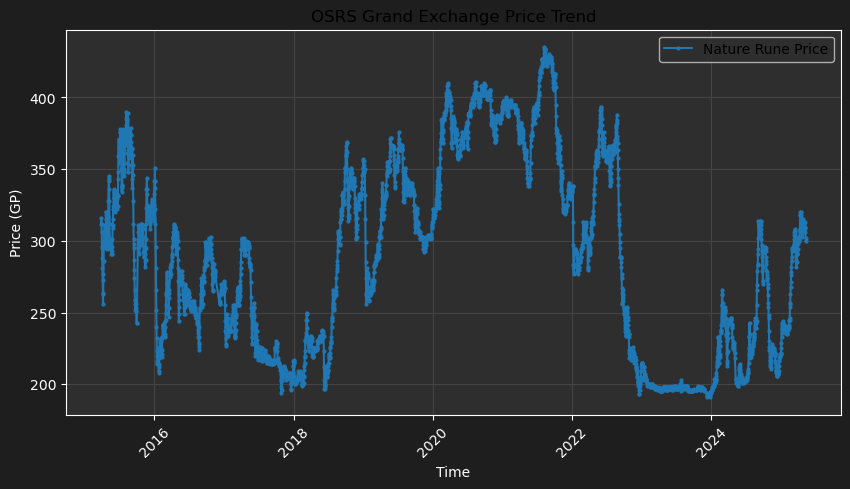

In [ ]:
nature = API.fetch_historical(20997)
plt.figure(figsize=(10, 5))
plt.plot(nature['timestamp'], nature['price'], marker="o", markersize='2', linestyle="-", label="Nature Rune Price")

plt.xlabel("Time")
plt.ylabel("Price (GP)")
plt.title("OSRS Grand Exchange Price Trend")
plt.legend()
plt.xticks(rotation=45)  # Rotate timestamps for clarity
plt.grid()

# Show the plot
plt.show()
